<a href="https://colab.research.google.com/github/Antoniomms87/Thinkful-Final-Capstone-Python/blob/main/Final_Capstone_Thinkful.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
import math
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
!pip install pyproj==1.9.6

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

import matplotlib.cm

from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

import seaborn as sns
sns.set()
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scipy.stats as sp
import os
from datetime import datetime
from scipy.stats import ttest_ind as ttest
from IPython.core.interactiveshell import InteractiveShell
%config InteractiveShell.ast_node_interactivity = 'all'


# suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 2.8 MB 5.1 MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp37-cp37m-linux_x86_64.whl size=3702500 sha256=b4bf0c94ba840cdc959f9fa65fd84aaa3fca6001145db67c85818b9e99e48b3e
  Stored in directory: /root/.cache/pip/wheels/08/60/55/38382877bab48a6abfca7bd66115e287ce5a9530cbce631771
Successfully built pyproj
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
     |████████████████████████████████| 133.1 MB 21 kB/s 
     |████████████████████████████████| 219 kB 4.4 MB/s 
  Created wheel for basemap: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
from google.colab import files
uploaded = files.upload()

Saving US Mass Shooting 1966-2019.csv to US Mass Shooting 1966-2019 (1).csv


In [7]:
df = pd.read_csv('US Mass Shooting 1966-2019 (1).csv')

In [18]:
n_data = len(df)
print(f"We have {n_data} data rows.")

We have 339 data rows.


In [8]:
df.head(3)

,S#,Title,Location,State,Date,Year,Area,Incident Area,Open/Close Location,Target,Cause,Summary,Shooter status,No. of shooter/suspect,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude,Year.1,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,1,Las Vegas Strip mass shooting,"Las Vegas, NV",Nevada,10/1/2017,2017,Public area,Las Vegas Strip Concert outside Mandala Bay,Open,random,-999,"Stephen Craig Paddock, opened fire from the 32...",committed suicide,one,58,527,585,1,64,-999,-999,-999,"White, White American or European American",Male,36.181271,-115.134132,2017,NaN,NaN,NaN,NaN
1,2,Orlando nightclub massacre,"Orlando, Florida",Florida,6/12/2016,2016,"Bar, Club",at nightclub,Close,random,-999,"Omar Mateen, 29, attacked the Pulse nighclub i...",killed,one,49,53,102,0,29,-999,-999,-999,Other,Male,28.519718,-81.376777,2016,NaN,NaN,NaN,NaN
2,3,Virginia Tech massacre,"Blacksburg, Virginia",Virginia,4/16/2007,2007,School,School Campus,Close,random,terrorism,"Virginia Tech student Seung-Hui Cho, 23, opene...",committed suicide,one,32,23,55,0,23,-999,-999,Yes,Asian or Asian American,Male,37.229573,-80.413939,2007,NaN,NaN,NaN,NaN


In [20]:
df.columns


Index(['S#', 'Title', 'Location', 'State', 'Date', 'Year', 'Area',
       'Incident Area', 'Open/Close Location', 'Target', 'Cause', 'Summary',
       'Shooter status', 'No. of shooter/suspect', 'Fatalities', 'Injured',
       'Total victims', 'Policeman Killed', 'Age', 'Employeed (Y/N)',
       'Employed at', 'Mental Health Issues', 'Race', 'Gender', 'Latitude',
       'Longitude', 'Year.1', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S#                      339 non-null    int64  
 1   Title                   339 non-null    object 
 2   Location                339 non-null    object 
 3   State                   339 non-null    object 
 4   Date                    339 non-null    object 
 5   Year                    339 non-null    int64  
 6   Area                    339 non-null    object 
 7   Incident Area           339 non-null    object 
 8   Open/Close Location     339 non-null    object 
 9   Target                  339 non-null    object 
 10  Cause                   339 non-null    object 
 11  Summary                 339 non-null    object 
 12  Shooter status          339 non-null    object 
 13  No. of shooter/suspect  339 non-null    object 
 14  Fatalities              339 non-null    in

In [22]:
df.describe()

,S#,Year,Fatalities,Injured,Total victims,Policeman Killed,Employeed (Y/N),Latitude,Longitude,Year.1,Unnamed: 27
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,0.0
mean,170.000000,2008.088496,4.241888,6.315634,10.557522,-100.094395,-810.280236,37.073669,-94.477016,2008.088496,NaN
std,98.005102,11.398555,5.697546,29.249955,33.015221,300.570114,391.773726,5.515872,16.535140,11.398555,NaN
min,1.000000,1966.000000,0.000000,0.000000,3.000000,-999.000000,-999.000000,21.325512,-161.792752,1966.000000,NaN
25%,85.500000,2002.500000,1.000000,1.000000,4.000000,0.000000,-999.000000,33.533469,-110.205485,2002.500000,NaN
50%,170.000000,2014.000000,3.000000,3.000000,5.000000,0.000000,-999.000000,36.754420,-88.122998,2014.000000,NaN
75%,254.500000,2016.000000,5.000000,5.000000,9.000000,0.000000,-999.000000,41.289861,-81.678142,2016.000000,NaN
max,339.000000,2019.000000,58.000000,527.000000,585.000000,5.000000,1.000000,60.790539,-69.707823,2019.000000,NaN


In [33]:
year_counts = df['Year'].value_counts()

In [34]:
year_counts.sort_values()


1990     1
1987     1
1971     1
1972     1
2000     1
1985     2
1982     2
1983     2
1974     2
1979     2
2004     2
2010     2
2001     2
2002     2
1966     2
1976     2
1984     3
1986     3
2003     3
1996     3
2005     3
1989     3
1992     4
1995     4
1994     4
1998     5
1991     5
2009     6
2008     6
2011     6
1997     6
1988     6
2006     6
1999     7
1993     9
2019    10
2007    10
2017    11
2018    12
2014    13
2012    15
2013    16
2015    65
2016    68
Name: Year, dtype: int64

In [9]:
df.dtypes

S#                          int64
Title                      object
Location                   object
State                      object
Date                       object
Year                        int64
Area                       object
Incident Area              object
Open/Close Location        object
Target                     object
Cause                      object
Summary                    object
Shooter status             object
No. of shooter/suspect     object
Fatalities                  int64
Injured                     int64
Total victims               int64
Policeman Killed            int64
Age                        object
Employeed (Y/N)             int64
Employed at                object
Mental Health Issues       object
Race                       object
Gender                     object
Latitude                  float64
Longitude                 float64
Year.1                      int64
Unnamed: 27               float64
Unnamed: 28                object
Unnamed: 29   

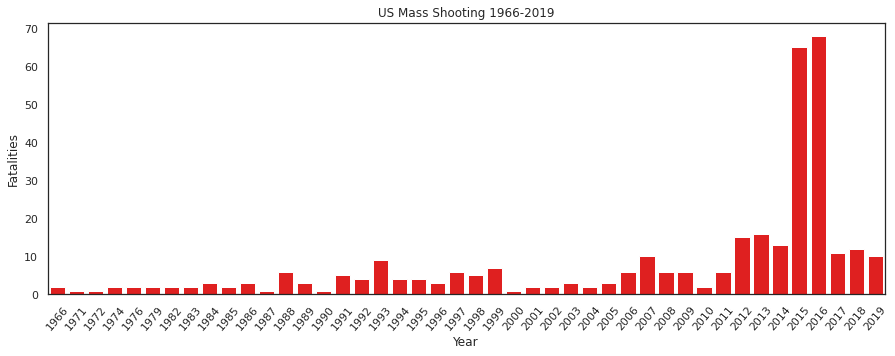

In [26]:
values = df['Year'].value_counts().sort_values(ascending=False)
labels = values.index
clrs=["red"]
sns.set_style("white")
plt.figure(figsize = (15,5))
sns.barplot(y=values, x=labels, palette=clrs)
plt.xticks(rotation=50)
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.title('US Mass Shooting 1966-2019');

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text major ticklabel objects>)

Text(0.5, 1.0, 'NUMBER OF PEOPLE KILLED AND INJURED IN YEARS')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'number of incident')

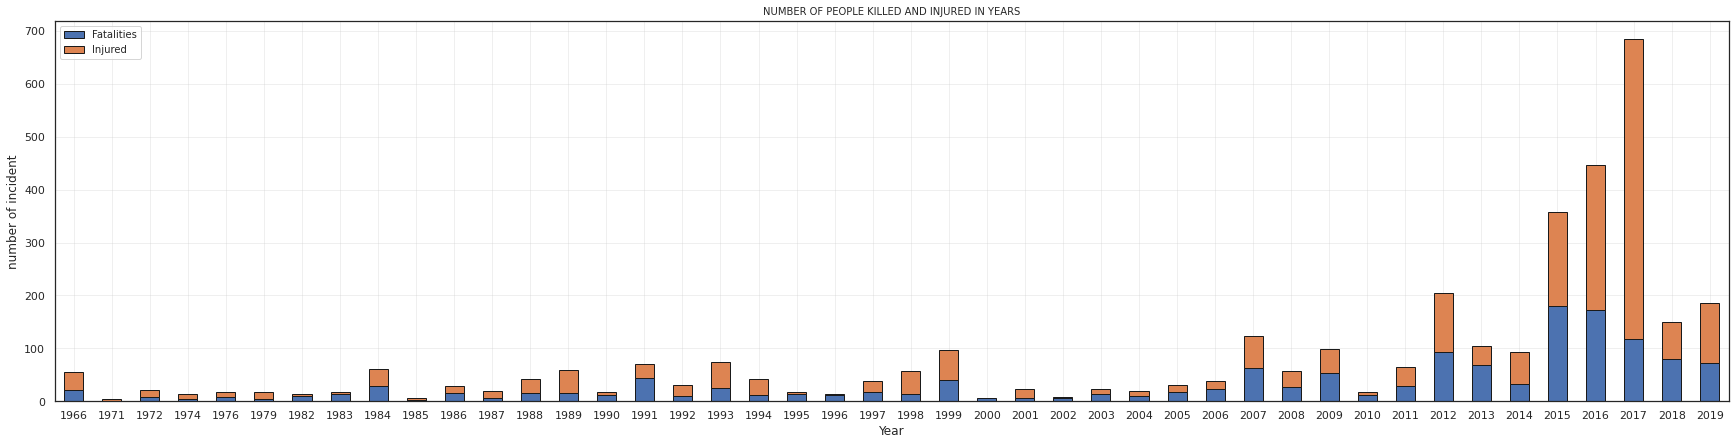

In [27]:
fig = df.groupby("Year")[["Fatalities","Injured"]].sum().plot(kind="bar",stacked=True,
                                                            figsize=(30,7),
                                                            linewidth = 1,
                                                            edgecolor = "k"*df["Year"].nunique())
plt.grid(True,alpha=.3)
plt.xticks(rotation=0)
fig.set_facecolor("white")
plt.legend(prop={"size":10})
plt.title("NUMBER OF PEOPLE KILLED AND INJURED IN YEARS",fontsize = 10)
plt.xlabel('Year')
plt.ylabel('number of incident')

plt.show()

([<matplotlib.patches.Wedge at 0x7f3c31513d50>,
 [Text(1.0816820207006175, 0.19990999498031337, '1966'),
  Text(1.0238778318045882, 0.40208728597051574, '1971'),
  Text(0.9850558244296316, 0.4895559444611609, '1972'),
  Text(0.9234922935643516, 0.5976303069015607, '1974'),
  Text(0.8561643089355827, 0.6906393241807596, '1976'),
  Text(0.7795078588503743, 0.7761233780723945, '1979'),
  Text(0.6794046983923955, 0.8651064996879507, '1982'),
  Text(0.48526513316537784, 0.9871766561938083, '1983'),
  Text(0.09083729352452254, 1.0962429411882841, '1984'),
  Text(-0.21401252082891117, 1.0789803709653178, '1985'),
  Text(-0.3886879963154029, 1.0290391836661603, '1986'),
  Text(-0.5773987849474422, 0.9362748758464138, '1987'),
  Text(-0.7379387183478913, 0.8157490103966242, '1988'),
  Text(-0.9286581096555762, 0.589571128339009, '1989'),
  Text(-1.0403989587205666, 0.357169436952773, '1990'),
  Text(-1.0879841797684018, -0.1621432224105539, '1991'),
  Text(-0.8966221202478273, -0.63723525756371

Text(0.5, 1.0, 'PROPORTION OF KILLINGS BY YEAR')

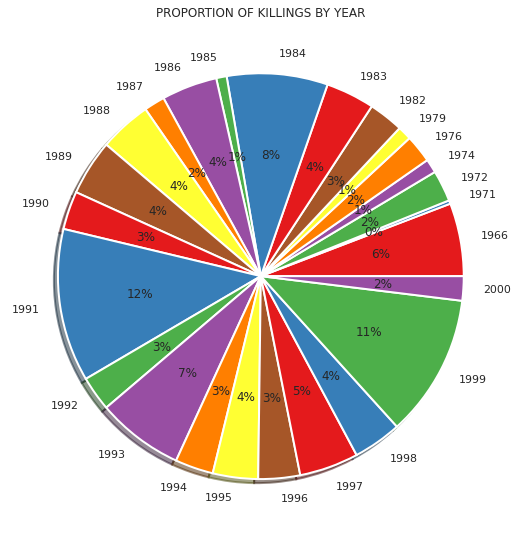

In [10]:
fatalities_year = df.groupby("Year")[["Fatalities","Injured"]].sum().sort_values('Year', ascending=True).head(25)
fig = plt.figure(figsize=(20,60))
plt.subplot(121)
plt.pie(fatalities_year["Fatalities"],labels=fatalities_year.index,autopct="%1.0f%%",shadow=True,
        colors=sns.color_palette("Set1",7),wedgeprops={"linewidth":2,"edgecolor":"white"})

plt.title("PROPORTION OF KILLINGS BY YEAR",fontsize=12)

fig.set_facecolor("w")

([<matplotlib.patches.Wedge at 0x7fab13dbdc10>,
 [Text(1.0793251100524832, 0.21226706482682453, '2019'),
  Text(0.9071322857486408, 0.6221824621061305, '2018'),
  Text(0.4740683377830839, 0.9926022421451526, '2017'),
  Text(-0.34936656721206205, 1.0430450621686773, '2016'),
  Text(-1.047152328108903, 0.33685605491975995, '2015'),
  Text(-1.0643266789404484, -0.2778645722210655, '2014'),
  Text(-0.9523840209291307, -0.5504222712416907, '2013'),
  Text(-0.6377736678680136, -0.8962392250812173, '2012'),
  Text(-0.3215000673011027, -1.0519684913177707, '2011'),
  Text(-0.20795871104014127, -1.0801634943389464, '2010'),
  Text(-0.016093121057249787, -1.0998822716339403, '2009'),
  Text(0.21944011887063244, -1.0778896206152293, '2008'),
  Text(0.4661320276745059, -0.996353819070341, '2007'),
  Text(0.67763745604111, -0.8664914761093343, '2006'),
  Text(0.7679274773032897, -0.787583258838458, '2005'),
  Text(0.824405784998441, -0.7282548329129747, '2004'),
  Text(0.8691884363575889, -0.674174

Text(0.5, 1.0, 'PROPORTION OF KILLINGS BY YEAR')

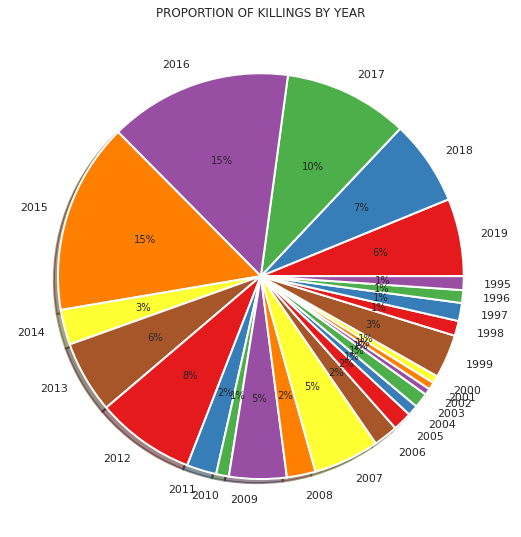

In [29]:
fatalities_year = df.groupby("Year")[["Fatalities","Injured"]].sum().sort_values('Year', ascending=False).head(25)
fig = plt.figure(figsize=(20,60))
plt.subplot(121)
plt.pie(fatalities_year["Fatalities"],labels=fatalities_year.index,autopct="%1.0f%%",shadow=True,
        colors=sns.color_palette("Set1",7),wedgeprops={"linewidth":2,"edgecolor":"white"})

plt.title("PROPORTION OF KILLINGS BY YEAR",fontsize=12)

fig.set_facecolor("w")

<Figure size 1440x1080 with 0 Axes>

(array([0.5]), <a list of 1 Text major ticklabel objects>)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5]),
 <a list of 44 Text major ticklabel objects>)

Text(156.5, 0.5, 'YEAR')

Text(0.5, 1.0, 'PEOPLE KILLED OVER YEARS')

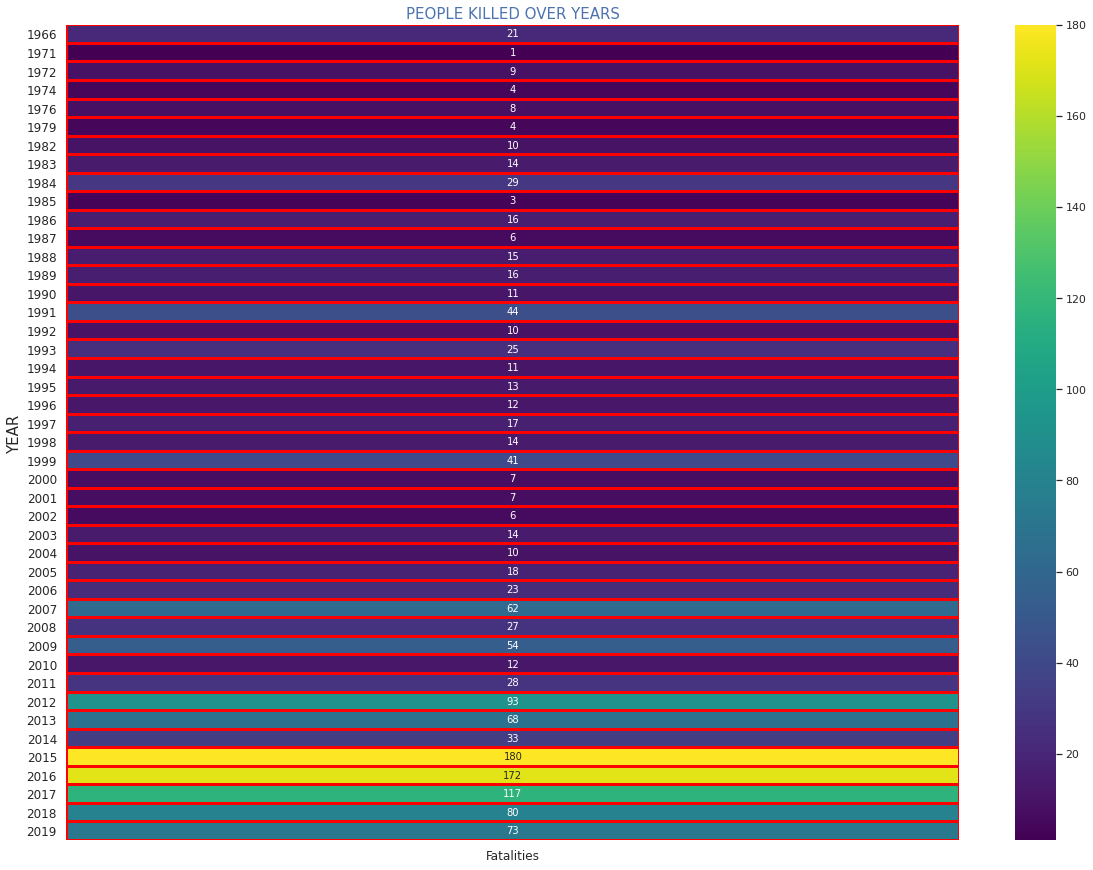

In [30]:
kills_my = pd.pivot_table(columns="Year",data=df,values="Fatalities",aggfunc="sum").fillna(0)

for i in kills_my.columns:
    kills_my[i] = kills_my[i].astype(np.int64)
plt.figure(figsize=(20,15))
fig = sns.heatmap(kills_my.transpose(),cmap="viridis",
                  annot=True,fmt="d",linecolor="red",linewidths=2)
plt.xticks(fontsize =12)
plt.yticks(fontsize =12,rotation=0)
plt.ylabel("YEAR",fontsize=15)
plt.title("PEOPLE KILLED OVER YEARS",fontsize=15,color="b")
plt.show()

Text(0, 0.5, 'STATE')

Text(0.5, 0, 'KILLED')

Text(0.5, 1.0, 'TOP STATES BY DEATHS DUE TO MASS SHOOTING')

Text(0.9, 0, '180')

Text(0.9, 1, '175')

Text(0.9, 2, '149')

Text(0.9, 3, '71')

Text(0.9, 4, '68')

Text(0.9, 5, '57')

Text(0.9, 6, '46')

Text(0.9, 7, '42')

Text(0.9, 8, '42')

Text(0.9, 9, '41')

Text(0.9, 10, '40')

Text(0.9, 11, '40')

Text(0.9, 12, '37')

Text(0.9, 13, '35')

Text(0.9, 14, '32')

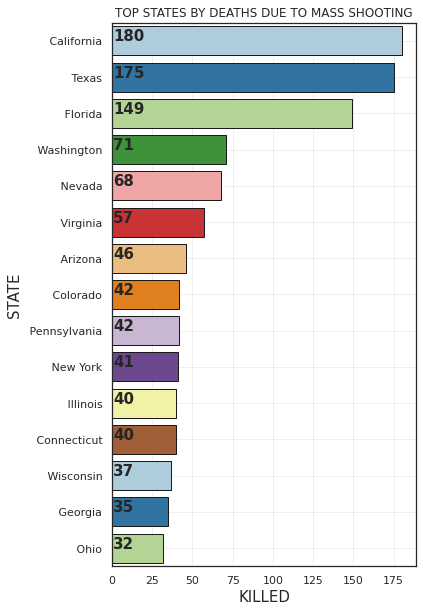

In [32]:
state_kill   = df.groupby("State")["Fatalities"].sum().reset_index().sort_values(by="Fatalities",ascending=False)
fig = plt.figure(figsize=(12,10))
plt.subplot(121)
ax = sns.barplot("Fatalities","State",
                 data=state_kill[:15],palette="Paired",
                 linewidth=1,edgecolor = "k"*15)
plt.ylabel("STATE",fontsize=15)
plt.xlabel("KILLED",fontsize=15)
plt.title("TOP STATES BY DEATHS DUE TO MASS SHOOTING")
for i,j in enumerate(state_kill["Fatalities"][:15]):
    ax.text(.9,i,j,weight="bold",fontsize=15)
plt.grid(True,alpha= .3)    
fig.set_facecolor("w")

<Figure size 936x576 with 0 Axes>

(-0.5, 1999.5, 999.5, -0.5)

Text(0.5, 1.0, 'STATES')

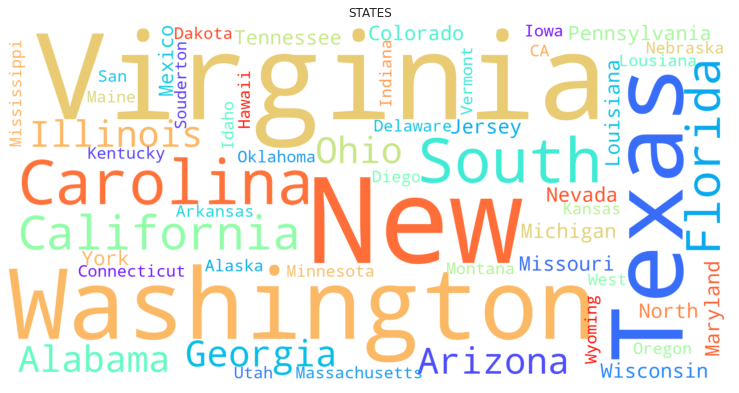

In [12]:
words = df["State"].value_counts().keys()
wc = WordCloud(max_words=60,scale=5,colormap="rainbow",background_color="white").generate(" ".join(words))
plt.figure(figsize=(13,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("STATES")
plt.show()

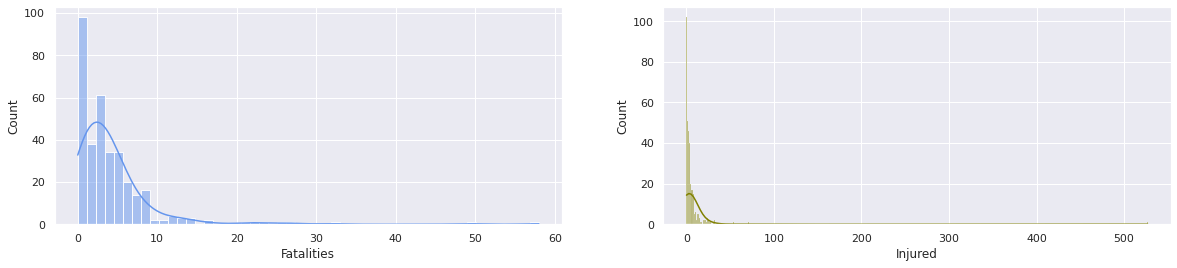

In [11]:
sns.set(style="darkgrid")

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2,figsize=(20, 4))
sns.histplot(data=df, x="Fatalities", kde=True, color="cornflowerblue", ax=ax0)
sns.histplot(data=df, x="Injured", kde=True, color="olive", ax=ax1)
plt.show()

Text(0.5, 1.0, 'Geography of US Mass Shootings')

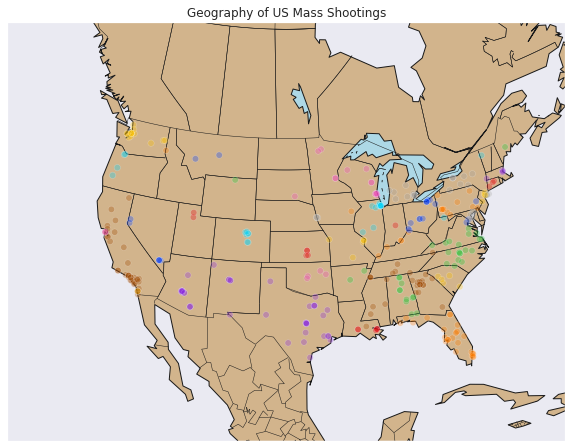

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
m = Basemap(width=6000000,height=4500000,resolution='c',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)
m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='lightblue', zorder=0)
plt.title("Geography of US Mass Shootings")
m.drawstates(linewidth=0.5, linestyle='solid', color='k')
m.drawcountries(linewidth=0.5, linestyle='solid', color='k' )
x, y = m(df['Longitude'].tolist(), df['Latitude'].tolist()) 
g=sns.scatterplot(x, y, hue='State',s=40, data=df, palette="bright", zorder=20,alpha=0.3)
g.legend_.remove()
#plt.scatter(x,y,marker='o', color='Red',alpha =0.1,s=2)
plt.show()

In [13]:
df["year"] = pd.DatetimeIndex(df["Date"]).year
df["month"]= pd.DatetimeIndex(df["Date"]).month
df["day"]  = pd.DatetimeIndex(df["Date"]).day
df["month"] = df["month"].map({1:"JAN",2:"FEB",3:"MAR",4:"APR",5:"MAY",6:"JUN",7:"JUL",8:"AUG",9:"SEP",10:"OCT",11:"NOV",12:"DEC"})
df["month_year"] = df["month"]+"-"+df["year"].astype(str)

<Figure size 1440x1080 with 0 Axes>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text major ticklabel objects>)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5]),
 <a list of 44 Text major ticklabel objects>)

Text(156.5, 0.5, 'YEAR')

Text(0.5, 111.5, 'MONTH')

Text(0.5, 1.0, 'PEOPLE KILLED OVER YEARS IN THEIR RESPECTIVE MONTHS')

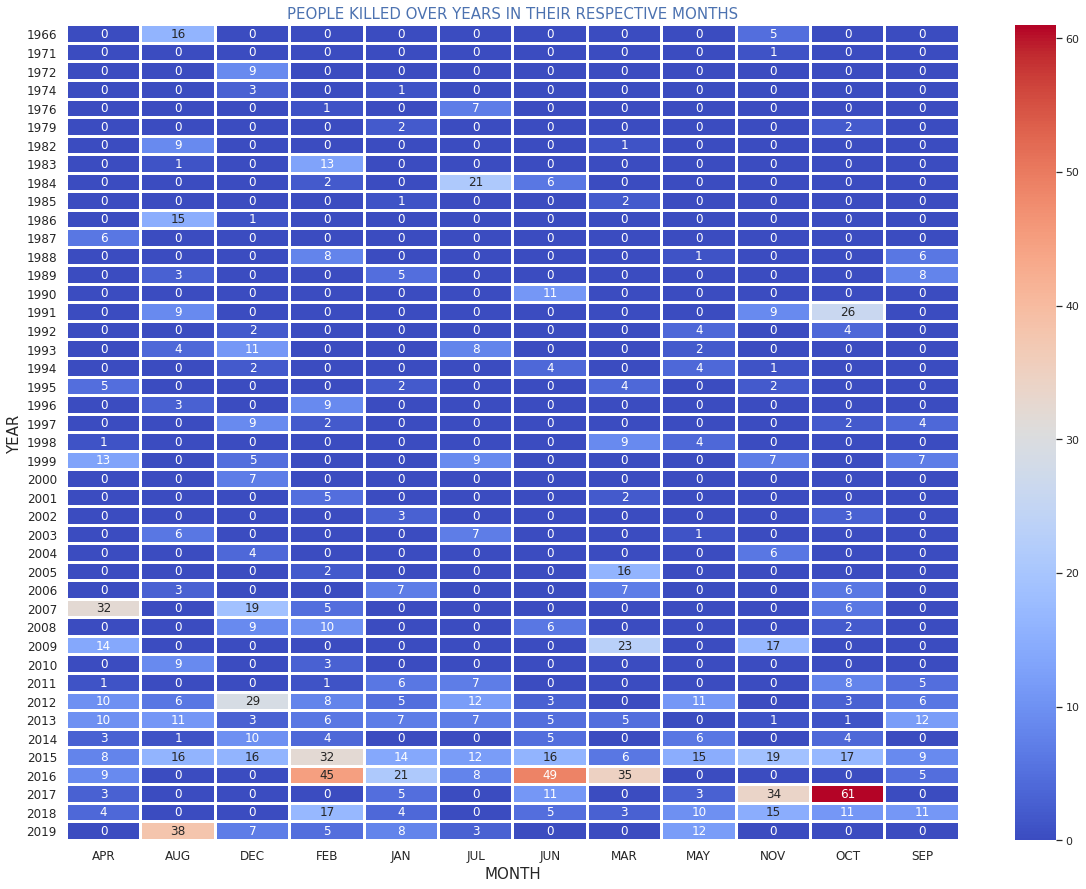

In [33]:
kills_my = pd.pivot_table(index="month",columns="year",data=df,values="Fatalities",aggfunc="sum").fillna(0)

for i in kills_my.columns:
    kills_my[i] = kills_my[i].astype(np.int64)
plt.figure(figsize=(20,15))
fig = sns.heatmap(kills_my.transpose(),cmap="coolwarm",
                  annot=True,fmt="d",linecolor="white",linewidths=2)
plt.xticks(fontsize =12)
plt.yticks(fontsize =12,rotation=0)
plt.ylabel("YEAR",fontsize=15)
plt.xlabel("MONTH",fontsize=15)
plt.title("PEOPLE KILLED OVER YEARS IN THEIR RESPECTIVE MONTHS",fontsize=15,color="b")
plt.show()

<Figure size 576x576 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7f3c24525f10>,
 [Text(1.1943284269753103, 0.11653157734571817, 'FEMALE'),
  Text(-1.0948010493095883, -0.10682070225674668, 'MALE')],
 [Text(0.6966915824022643, 0.06797675345166893, '3%'),
  Text(-0.5971642087143209, -0.058265837594589094, '97%')])

Text(0.5, 1.0, 'GENDER PROPORTION BY PARTICIPANTS')

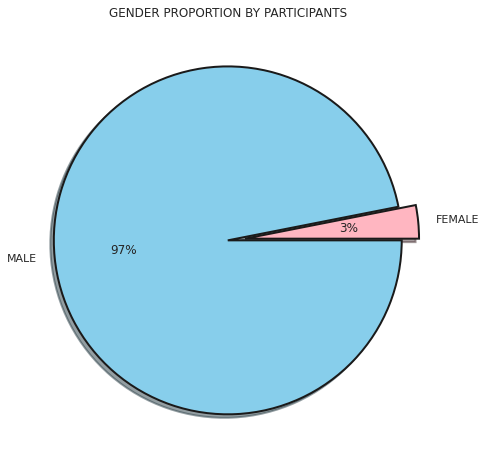

In [36]:
gender = df["Gender"].str.replace("[::0-9|]","").str.upper()
gender = gender.str.replace("FEMALE","F")
gender = gender.str.replace("MALE","M")
gender = pd.DataFrame(gender)
gender = gender[gender["Gender"].notnull()]
gender["female"] = gender["Gender"].str.count("F")
gender["male"]   = gender["Gender"].str.count("M")
size = [sum(gender["female"]),sum(gender["male"])]
plt.figure(figsize=(8,8))
plt.pie(size,labels=["FEMALE","MALE"],shadow=True,colors=["lightpink","skyblue"],autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0])
plt.title("GENDER PROPORTION BY PARTICIPANTS")
plt.show()